# Problem Statement

Importing the Dependencies

In [7]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix


# Loading the Dataset from kaggle

In [8]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

Using Colab cache for faster access to the 'face-mask-dataset' dataset.


In [9]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3801.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_501.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1782.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2493.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_827.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2944.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1969.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2327.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3579.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_423.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1770.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1580.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2897.jpg
/kaggle/input/fa

In [10]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# import shutil

# # The 'path' variable holds the base directory of the downloaded dataset
# # from the previous kagglehub.dataset_download step.
# # The actual image data is typically found in a 'data' subdirectory within this path.
# base_input_path = os.path.join(path, "data") # Corrected base input path
# with_mask_src = os.path.join(base_input_path, "with_mask")
# without_mask_src = os.path.join(base_input_path, "without_mask")

# base_output_path = "/kaggle/working/all_images"
# with_mask_dst = os.path.join(base_output_path, "with_mask")
# without_mask_dst = os.path.join(base_output_path, "without_mask")

# # Create destination folders
# os.makedirs(with_mask_dst, exist_ok=True)
# os.makedirs(without_mask_dst, exist_ok=True)

# # Copy with_mask images if the destination directory is empty (to avoid redundant copies on re-execution)
# if not os.listdir(with_mask_dst):
#     for img in os.listdir(with_mask_src):
#         src_file = os.path.join(with_mask_src, img)
#         dst_file = os.path.join(with_mask_dst, img)
#         shutil.copy(src_file, dst_file)

# # Copy without_mask images if the destination directory is empty
# if not os.listdir(without_mask_dst):
#     for img in os.listdir(without_mask_src):
#         src_file = os.path.join(without_mask_src, img)
#         dst_file = os.path.join(without_mask_dst, img)
#         shutil.copy(src_file, dst_file)

# # Get the list of images in the with_mask directory
# with_mask_images = os.listdir(with_mask_dst)

# # Check if there are any images in the directory
# if with_mask_images:
#     # Get the first image name
#     first_image_name = with_mask_images[0]
#     # Construct the full path to the first image
#     first_image_path = os.path.join(with_mask_dst, first_image_name)

#     # Display the image
#     img = mpimg.imread(first_image_path)
#     plt.imshow(img)
#     plt.axis('off') # Hide axes
#     plt.title(f'First Image: {first_image_name}')
#     plt.show()
# else:
#     print(f"No images found in {with_mask_dst} after ensuring setup.")

In [11]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [12]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

Using Colab cache for faster access to the 'face-mask-dataset' dataset.


In [13]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [14]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_1942.jpg
with_mask_2679.jpg
with_mask_3501.jpg
with_mask_2377.jpg
with_mask_2624.jpg


First 5 'without mask' files:
without_mask_3680.jpg
without_mask_1661.jpg
without_mask_560.jpg
without_mask_1562.jpg
without_mask_2099.jpg


In [15]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_1942.jpg
with_mask_2679.jpg
with_mask_3501.jpg
with_mask_2377.jpg
with_mask_2624.jpg


First 5 'without mask' files:
without_mask_3680.jpg
without_mask_1661.jpg
without_mask_560.jpg
without_mask_1562.jpg
without_mask_2099.jpg


In [16]:
import os
import shutil

# Source paths (read-only)
# Use the 'path' variable from kagglehub.dataset_download
base_input_path = os.path.join(path, "data")
with_mask_src = os.path.join(base_input_path, "with_mask")
without_mask_src = os.path.join(base_input_path, "without_mask")

# Destination paths (writable)
base_output_path = "/kaggle/working/all_images"
with_mask_dst = os.path.join(base_output_path, "with_mask")
without_mask_dst = os.path.join(base_output_path, "without_mask")

# Create destination folders
os.makedirs(with_mask_dst, exist_ok=True)
os.makedirs(without_mask_dst, exist_ok=True)

# Copy with_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(with_mask_dst):
    for img in os.listdir(with_mask_src):
        src_file = os.path.join(with_mask_src, img)
        dst_file = os.path.join(with_mask_dst, img)
        shutil.copy(src_file, dst_file)

# Copy without_mask images
# Only copy if the destination directory is empty to avoid re-copying existing files
if not os.listdir(without_mask_dst):
    for img in os.listdir(without_mask_src):
        src_file = os.path.join(without_mask_src, img)
        dst_file = os.path.join(without_mask_dst, img)
        shutil.copy(src_file, dst_file)

print("With mask images:", len(os.listdir(with_mask_dst)))
print("Without mask images:", len(os.listdir(without_mask_dst)))


With mask images: 3725
Without mask images: 3828


In [17]:
import os

# Paths are expected to be defined in a preceding cell
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

# Get and print the first five 'with mask' files
if os.path.exists(with_mask_path):
    with_mask_files = os.listdir(with_mask_path)
    print("First 5 'with mask' files:")
    for i in range(min(5, len(with_mask_files))):
        print(with_mask_files[i])
else:
    print(f"Directory not found: {with_mask_path}")

print("\n") # Add a newline for better readability

# Get and print the first five 'without mask' files
if os.path.exists(without_mask_path):
    without_mask_files = os.listdir(without_mask_path)
    print("First 5 'without mask' files:")
    for i in range(min(5, len(without_mask_files))):
        print(without_mask_files[i])
else:
    print(f"Directory not found: {without_mask_path}")

First 5 'with mask' files:
with_mask_1942.jpg
with_mask_2679.jpg
with_mask_3501.jpg
with_mask_2377.jpg
with_mask_2624.jpg


First 5 'without mask' files:
without_mask_3680.jpg
without_mask_1661.jpg
without_mask_560.jpg
without_mask_1562.jpg
without_mask_2099.jpg


# Creating Labels for the two class of images


with mask - 1
without mask - 0


In [18]:
#create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [19]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# Display the images

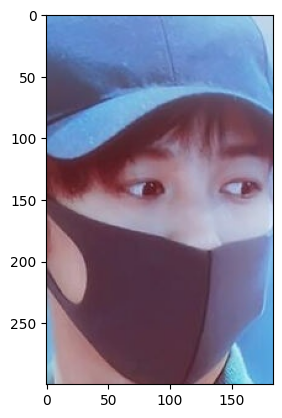

In [21]:
img = mpimg.imread('/kaggle/working/all_images/with_mask/with_mask_192.jpg')
imgplot = plt.imshow(img)
plt.show()
# plt.imshow(img)

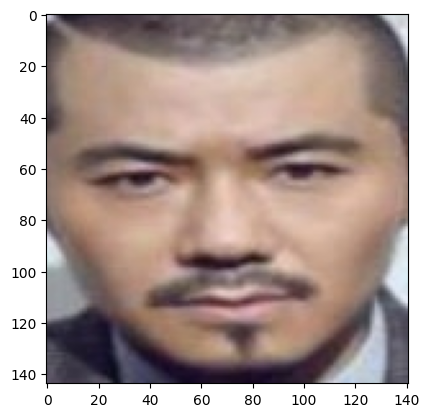

In [22]:
# without masks
img = mpimg.imread('/kaggle/working/all_images/without_mask/without_mask_192.jpg')
imgplot = plt.imshow(img)
plt.show()
# plt.imshow(img)

# Image processing

resize and convert to numpy arrays

In [23]:
#converting to numpy arrays
with_mask_path = '/kaggle/working/all_images/with_mask'
without_mask_path = '/kaggle/working/all_images/without_mask'

data = []

for img in with_

SyntaxError: expected ':' (ipython-input-503308414.py, line 7)